# Arbre de décision

In [1]:
#lire le dataset
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("breast.data")

In [2]:
#Exploration
df.head()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#afficher
df.describe()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
#Verifier la présence de NaN
df.isnull().sum()

id_number                      0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
#nettoyer
df.replace('?', -99999, inplace=True)

In [6]:
#creer X 
X = df.drop("Class", axis=1)
X=X.drop("id_number", axis=1)
print(X.head())
X.shape

   Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                5                     1                      1   
1                5                     4                      4   
2                3                     1                      1   
3                6                     8                      8   
4                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3                1        1  
3                3

(699, 9)

In [7]:
#description
X.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
#créer y
y =df["Class"]
print(y.head())
y.shape

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


(699,)

In [9]:
from sklearn.model_selection import train_test_split
#Faire un split train-test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state=44)

# Approche avec entropy

In [10]:
#créer le modele avec Entropy
classifier = DecisionTreeClassifier(criterion="entropy", random_state=44, max_depth=6, min_samples_leaf=5) 

In [11]:
# train modele
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=44)

In [12]:
#Prediction
y_pred = classifier.predict(X_test)

In [13]:
from sklearn import metrics
#Metrique Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9428571428571428


In [14]:
#autres metriques
print ("Precision:", metrics.precision_score(y_test, y_pred, average="weighted") )
print ("Recall:", metrics.recall_score(y_test, y_pred, average="weighted") )
print ("F1 score:", metrics.f1_score(y_test, y_pred, average="weighted") )

Precision: 0.9428571428571428
Recall: 0.9428571428571428
F1 score: 0.9428571428571428


In [15]:
#Prédiction out-of-sample

x = [[4,2,1,1,1,2,3,2,1]]
y_pred = classifier.predict(x)
print(y_pred)

[2]


C:\Users\mhafo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install six
# conda install -c anaconda graphviz

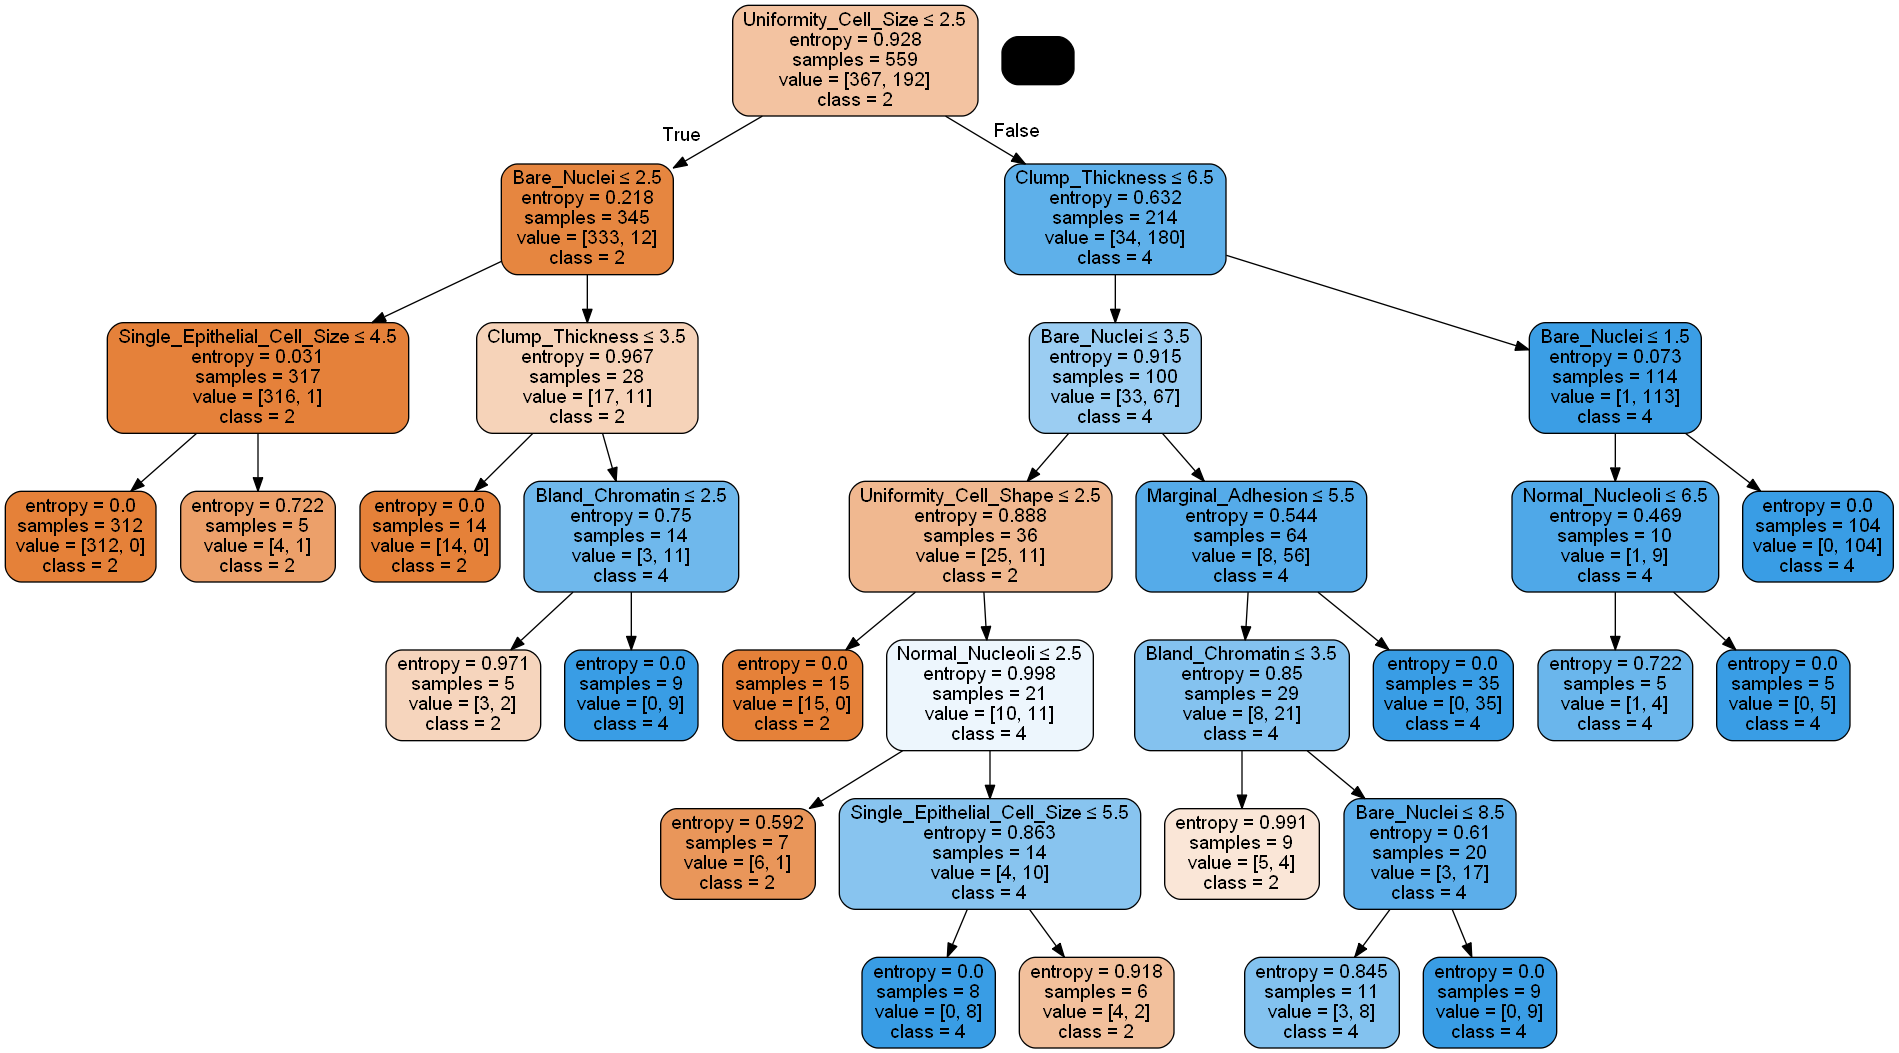

In [20]:
#Visualisation de l'arbre avec entropie
# !pip install graphviz
# !pip install pydotplus
# !pip install six
#pip install graphviz
#ou utiliser anaconda navigator

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

import os     

os.environ["PATH"] += os.pathsep + 'C:\\Users\\mhafo\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = StringIO()
feature_cols = ["Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape","Marginal_Adhesion",
                "Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]
export_graphviz(classifier, out_file= dot_data ,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['2','4'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast_ent.png')
Image(graph.create_png())

# !dot -Tpng dot_data.dot -o tree.png
# import matplotlib.pyplot as plt
# import cv2
# %matplotlib inline
# img = cv2.imread('tree.png')
# plt.figure(figsize = (20, 20))
# plt.imshow(img)

# Approche avec GINI

In [21]:
#créer le modele avec GINI
classifier = DecisionTreeClassifier(criterion="gini", random_state=44, max_depth=6, min_samples_leaf=5) 

In [23]:
# train modele
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=44)

In [24]:
#Prediction
y_pred = classifier.predict(X_test)

In [25]:
from sklearn import metrics
#Metrique Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#autres metriques
print ("Precision:", metrics.precision_score(y_test, y_pred, average="weighted") )
print ("Recall:", metrics.recall_score(y_test, y_pred, average="weighted") )
print ("F1 score:", metrics.f1_score(y_test, y_pred, average="weighted") )

Accuracy: 0.9857142857142858
Precision: 0.9857142857142858
Recall: 0.9857142857142858
F1 score: 0.9857142857142858


In [26]:
#Prédiction out-of-sample

x = [[4,2,1,1,1,2,3,2,1]]
y_pred = classifier.predict(x)
print(y_pred)

[2]


C:\Users\mhafo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


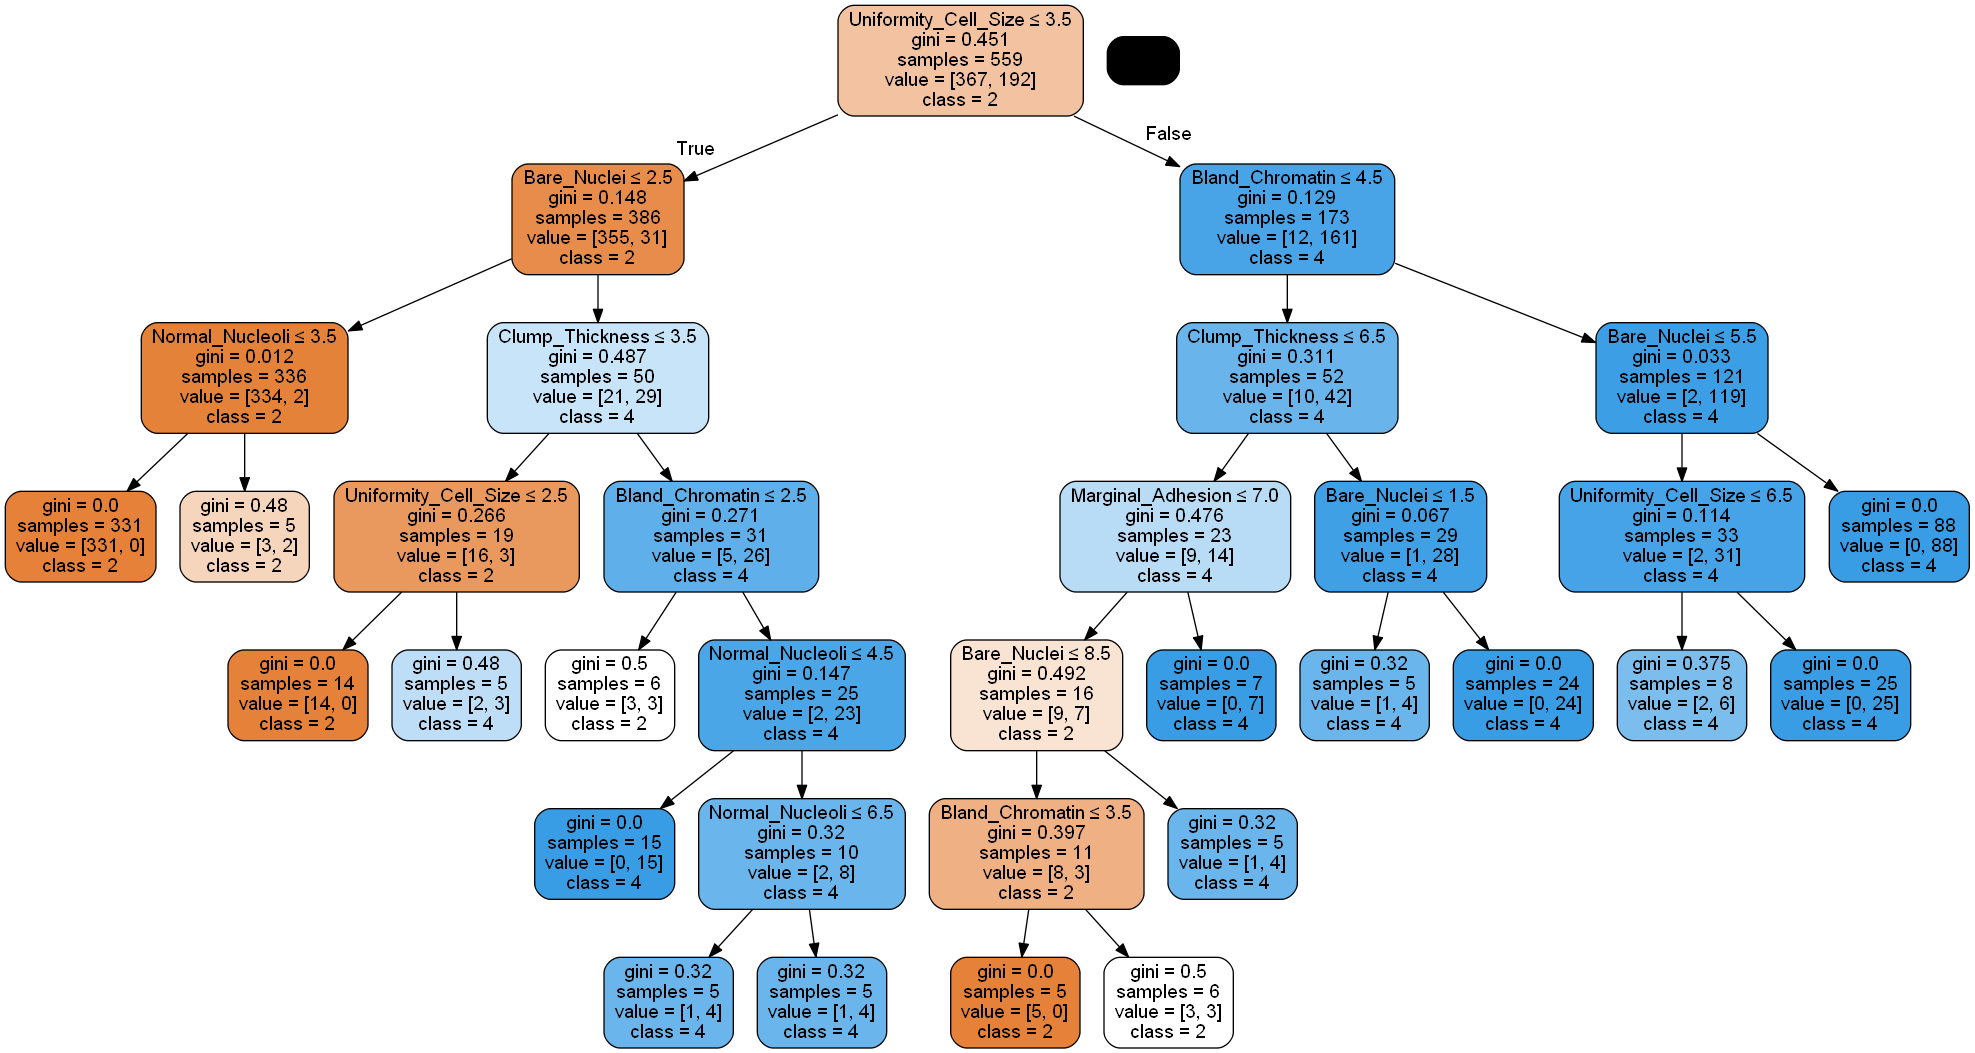

In [28]:
#Visualisation de l'arbre avec gini
#pip install graphviz
#pip install pydotplus
#ou utiliser anaconda navigator

from sklearn.tree import export_graphviz
from six import StringIO   
from IPython.display import Image  
import pydotplus

import os     

os.environ["PATH"] += os.pathsep + 'C:\\Users\\HBenteftifa\\AppData\\Local\\conda\\conda\\pkgs\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = StringIO()
feature_cols = ["Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape","Marginal_Adhesion",
                "Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]
classifier = DecisionTreeClassifier(criterion="gini", random_state=44, max_depth=6, min_samples_leaf=5) 
# train modele
classifier.fit(X_train,y_train)
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast_gini.png')
Image(graph.create_png())

# Note

* criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
* splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
* max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.
* max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
* min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
* max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
* min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

#Référence intéressante
https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/